# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [3]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [5]:
# Your code here
x_train_size = x_train.shape
print("x_train size:", x_train_size)

x_test_size = x_test.shape
print("x_test size:", x_test_size)

x_train size: (50000, 32, 32, 3)
x_test size: (10000, 32, 32, 3)


In [6]:
x_train_original = x_train
y_train_original = y_train
x_test_original = x_test
y_test_original = y_test


In [7]:
y_train_size = y_train.shape
print("y_train size:", y_train_size)
y_test_size = y_test.shape
print("y_test size:", y_test_size)

y_train size: (50000, 1)
y_test size: (10000, 1)


In [8]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [9]:
import pandas as pd

pd_y_train = pd.DataFrame(y_train, columns = ['Train_Y'])
pd_y_train.head()
pd_y_train.describe()

,Train_Y
count,50000.000000
mean,49.500000
std,28.866359
min,0.000000
25%,24.750000
50%,49.500000
75%,74.250000
max,99.000000


In [10]:
array_classes = pd.unique(pd_y_train['Train_Y'])
print(array_classes)


[19 29  0 11  1 86 90 28 23 31 39 96 82 17 71  8 97 80 74 59 70 87 84 64
 52 42 47 65 21 22 81 24 78 45 49 56 76 89 73 14  9  6 20 98 36 55 72 43
 51 35 83 33 27 53 92 50 15 18 46 75 38 66 77 69 95 99 93  4 61 94 68 34
 32 88 67 30 62 63 40 26 48 79 85 54 44  7 12  2 41 37 13 25 10 57  5 60
 91  3 58 16]


In [11]:
num_classes = len(array_classes)
print('number of classes: ',num_classes)

number of classes:  100


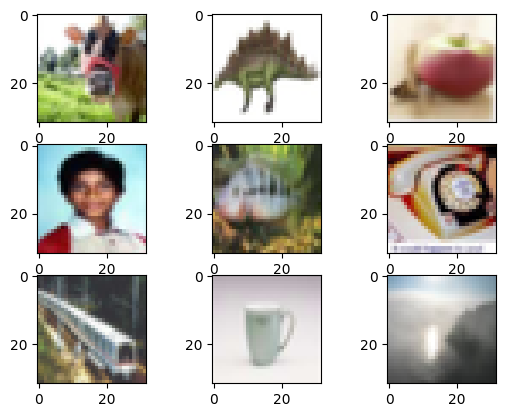

In [12]:
# example of loading the cifar10 dataset
from matplotlib import pyplot

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)  #?
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [13]:
# Your code here
# load dataset
# (train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')
# summarize dataset shape
print('Train', x_train.shape, y_train.shape)
print('Test', (x_test.shape, y_test.shape))
# summarize pixel values
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())


Train (50000, 32, 32, 3) (50000, 1)
Test ((10000, 32, 32, 3), (10000, 1))
Train 0 255 121.936059453125 68.38895658894971
Test 0 255 122.24118916015625 68.63056877656638


We can see that all images are 32  by 32 pixels with 3 channels for. There are 50,000 images for the training dataset and 10,000 for the test dataset.

We can also see that pixel values are integer values between 0 and 255 and that the mean and standard deviation of the pixel values are similar between the two datasets.

In [14]:
# scale pixels
# This function must be called to prepare the pixel values prior to any modeling.
def prep_pixels(train):
	# convert from integers to floats
	train_norm = train.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0

	# return normalized images
	return train_norm

In [15]:
x_train = prep_pixels(x_train)
x_test = prep_pixels(x_test)

In [16]:
# summarize pixel values
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train 0.0 1.0 0.47818068 0.2681919
Test 0.0 1.0 0.47937703 0.26913947


In [17]:
# convert the labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [18]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.2, # 20% of the data is used for validation
    random_state=42 # Providing a value here means getting the same "random" split every time
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# define model
'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))
'''

# example of a vgg style architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
'''
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
'''
# example output part of the model
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,071,748 (4.09 MB)

 Trainable params: 1,071,748 (4.09 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [20]:
from keras import optimizers

# Your code here
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [21]:
# Your code here

history=model.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=10, # Number of epochs
    batch_size=32, # Number of samples per batch
    # validation_split=0.2 # Use 20% of the data for validation
    validation_data = (x_val, y_val)
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0570 - loss: 4.2871 - val_accuracy: 0.1779 - val_loss: 3.4626
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2041 - loss: 3.2924 - val_accuracy: 0.2441 - val_loss: 3.0631
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2955 - loss: 2.8077 - val_accuracy: 0.2688 - val_loss: 2.9272
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3532 - loss: 2.5036 - val_accuracy: 0.3035 - val_loss: 2.8036
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3976 - loss: 2.2663 - val_accuracy: 0.2990 - val_loss: 2.8303
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4470 - loss: 2.0613 - val_accuracy: 0.3006 - val_loss: 2.8749
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4809 - loss: 1.8941 - val_accuracy: 0.3030 - val_loss: 2.9404
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5119 - loss: 1.7444 -

In [22]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Val: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 100)
Val: X=(10000, 32, 32, 3), y=(10000, 100)
Test: X=(10000, 32, 32, 3), y=(10000, 100)


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [23]:
# evaluate model

loss, accuracy  = model.evaluate(x_test, y_test, verbose=0)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

# The test set loss and accuracy can show the performance of the model, trained by the training set.

Loss:     3.31
Accuracy: 29.36%


In [24]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='val')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='val')

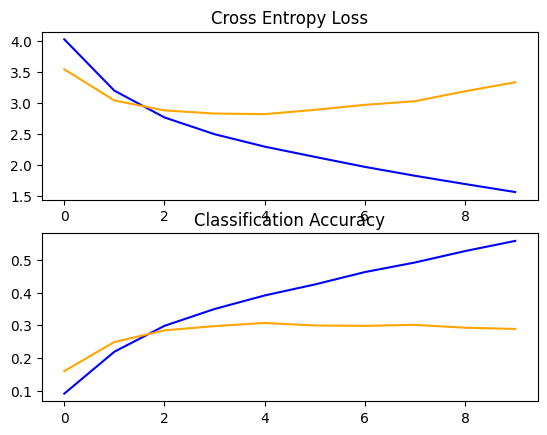

In [51]:
summarize_diagnostics(history)

The model was able to learn the training dataset, showing an improvement on the training dataset and validation dataset. The model showed overfitting starting at epoch 5.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [25]:
# Your code here

# Get the predictions for the test data
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
import numpy as np
# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified_indices = np.where(predicted_classes != true_classes)[0]


# Get the misclassified samples themselves
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

# Get the correctly classified samples themselves
# correctlyclassified_samples = x_test[correctlyclassified_indices]
# correctlyclassified_labels = np.argmax(y_test[correctlyclassified_indices], axis=1)

In [29]:
print (misclassified_indices)

[   0    1    2 ... 9997 9998 9999]


In [30]:
print (misclassified_labels)

[49 33 72 ... 51 42 70]


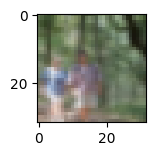

In [31]:
import matplotlib.pyplot as pyplot
i=1
	# define subplot
pyplot.subplot(330 + 1 + i)  #?
	# plot raw pixel data
pyplot.imshow(x_test[i])
# show the figure
pyplot.show()

In [32]:
print(y_test[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [33]:
print(y_test_original[i])

[33]


In [34]:
x_test_resized = np.expand_dims(x_test, 0)

In [35]:
model.predict(x_test)[i]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5.2346177e-06, 2.5137968e-04, 2.4061475e-03, 1.6463351e-02,
       2.8933559e-03, 7.1200245e-04, 8.2674724e-06, 1.2304756e-04,
       1.8451704e-03, 8.1288023e-04, 2.9876497e-05, 8.8055321e-04,
       3.0564270e-03, 3.2494115e-04, 1.1123228e-04, 1.3470933e-04,
       2.1426552e-03, 1.6116664e-04, 1.6342846e-03, 2.0690151e-03,
       4.1524981e-08, 4.3996265e-03, 1.6277801e-02, 1.2404522e-05,
       4.2007894e-08, 1.1208487e-03, 2.0539574e-05, 1.1011135e-03,
       2.3063531e-05, 8.6878717e-05, 3.0229165e-05, 3.9192713e-03,
       4.2098118e-03, 2.1173049e-02, 1.5565506e-02, 8.3842158e-04,
       3.6841009e-03, 9.0187928e-03, 2.3662325e-02, 6.1137374e-03,
       2.5995958e-04, 1.0805021e-05, 3.9286450e-03, 6.9056911e-04,
       1.0832518e-03, 2.1181046e-05, 5.0646707e-04, 5.0444291e-06,
       6.3130701e-06, 2.6791374e-06, 3.7222493e-03, 3.8168064e-04,
       1.3602195e-06, 4.2282618e-06, 4.4316304e-05, 7.7703693e-03,
       5.4514169e-04, 3.2812587e-04, 2.9078187e-06, 1.8186352e

In [36]:
np.argmax(model.predict(x_test), axis=1)[i]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


80

<ipython-input-37-67181663724e>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax0.set_title("True image label: %d" % y_test_original[sample_idx]);


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


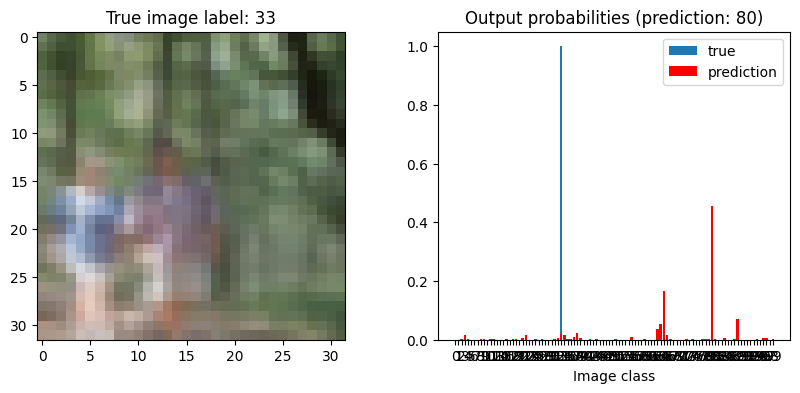

In [37]:
# plot mislabled image
import matplotlib.pyplot as plt

#def one_hot(n_classes, y):
#    return np.eye(n_classes)[y]

def plot_prediction(model, sample_idx=0, classes=range(100)):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.imshow(x_test[sample_idx:sample_idx+1].reshape(32,32,3), interpolation='nearest')
    ax0.set_title("True image label: %d" % y_test_original[sample_idx]);


    ax1.bar(classes, y_test[sample_idx], label='true')
    ax1.bar(classes, model(x_test)[sample_idx], label='prediction', color="red")
    ax1.set_xticks(classes)
    prediction = np.argmax(model.predict(x_test), axis=1)[sample_idx]
    ax1.set_title('Output probabilities (prediction: %d)'
                  % prediction)
    ax1.set_xlabel('Image class')
    ax1.legend()

plot_prediction(model, sample_idx=1)

The image was mislabeled. The true lable is 33, whereas the prediction is 80.

<ipython-input-38-f37ac1e6890d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax0.set_title("True image label: %d" % y_test_original[sample_idx]);


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


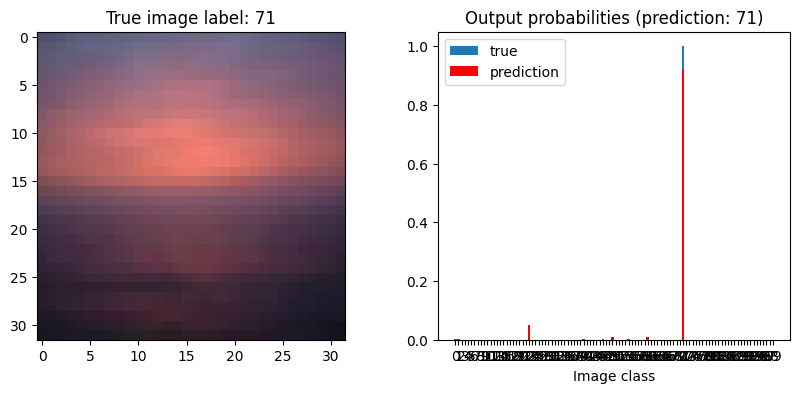

In [38]:
# plot correctly labled image
def plot_prediction(model, sample_idx=0, classes=range(100)):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.imshow(x_test[sample_idx:sample_idx+1].reshape(32,32,3), interpolation='nearest')
    ax0.set_title("True image label: %d" % y_test_original[sample_idx]);


    ax1.bar(classes, y_test[sample_idx], label='true')
    ax1.bar(classes, model(x_test)[sample_idx], label='prediction', color="red")
    ax1.set_xticks(classes)
    prediction = np.argmax(model.predict(x_test), axis=1)[sample_idx]
    ax1.set_title('Output probabilities (prediction: %d)'
                  % prediction)
    ax1.set_xlabel('Image class')
    ax1.legend()

plot_prediction(model, sample_idx=4)

The image was correctly labeled. The true lable is 71, same as the predicted label.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [40]:
# Your code here
from tensorflow.keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
# define cnn model, increase layers, add dropout
#def define_model():
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='softmax'))

model.summary()

from keras import optimizers

# compile model

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,215,246 (12.27 MB)

 Trainable params: 1,071,748 (4.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,143,498 (8.18 MB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [41]:
# Your code here

history1=model1.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=40, # Number of epochs
    batch_size=32, # Number of samples per batch
    # validation_split=0.2 # Use 20% of the data for validation
    validation_data = (x_val, y_val)
)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0590 - loss: 4.4813 - val_accuracy: 0.1896 - val_loss: 3.3846
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1736 - loss: 3.4470 - val_accuracy: 0.2677 - val_loss: 2.9235
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2448 - loss: 3.0368 - val_accuracy: 0.3520 - val_loss: 2.5020
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2968 - loss: 2.7512 - val_accuracy: 0.3650 - val_loss: 2.4422
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3333 - loss: 2.5732 - val_accuracy: 0.4072 - val_loss: 2.2437
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3671 - loss: 2.4215 - val_accuracy: 0.4336 - val_loss: 2.1003
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3918 - loss: 2.3073 - val_accuracy: 0.4569 - val_loss: 2.0117
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4060 - loss: 2.213

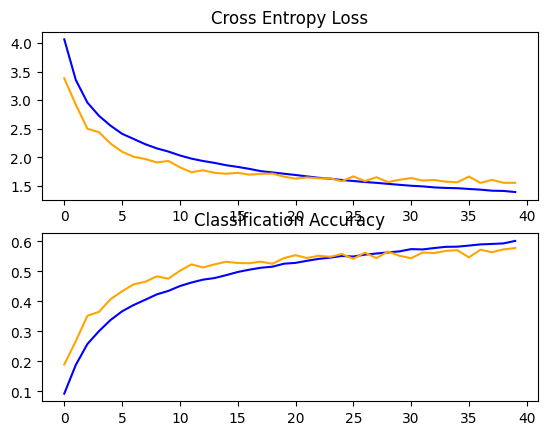

In [42]:
# Your code here
# Plot the accuracy and loss

summarize_diagnostics(history1)


In [43]:
# evaluate model

loss, accuracy  = model1.evaluate(x_test, y_test, verbose=0)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Loss:     1.53
Accuracy: 57.15%


In [51]:
# Get the predictions for the test data
predictions1 = model1.predict(x_test)

import numpy as np
# Get the index of the largest probability (i.e. the predicted class)
predicted_classes1 = np.argmax(predictions1, axis=1)
true_classes1 = np.argmax(y_test, axis=1)
misclassified_indices1 = np.where(predicted_classes1 != true_classes1)[0]


# Get the misclassified samples themselves
misclassified_samples1 = x_test[misclassified_indices1]
misclassified_labels1 = np.argmax(y_test[misclassified_indices1], axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
print (misclassified_indices1)

[   2    5    6 ... 9994 9996 9998]


In [53]:
print (misclassified_labels1)

[72 92 15 ... 50 14 42]


<ipython-input-38-f37ac1e6890d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax0.set_title("True image label: %d" % y_test_original[sample_idx]);


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


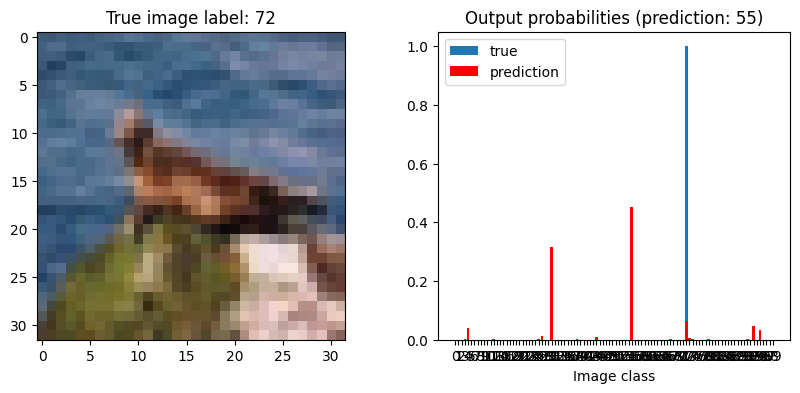

In [55]:
# plot mislabled image

plot_prediction(model1, sample_idx=2)

The image is mislabeled. The true image label is 72, it was prediected as 55.

<ipython-input-38-f37ac1e6890d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax0.set_title("True image label: %d" % y_test_original[sample_idx]);


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


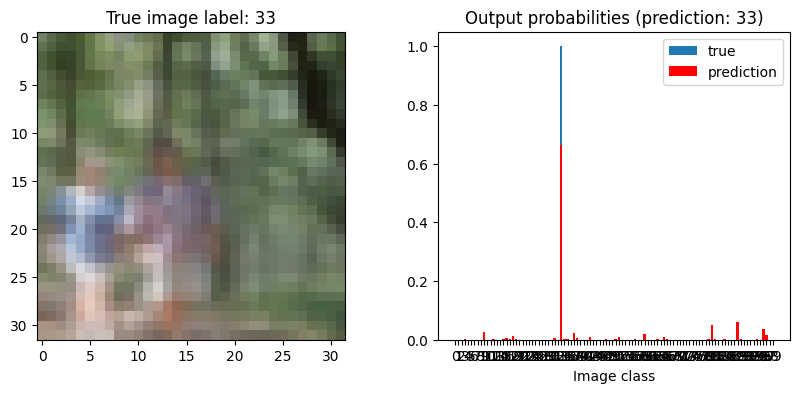

In [56]:
# plot correctly labeled image

plot_prediction(model1, sample_idx=1)

The image is correctly labeled, the same image was mislabeled in the 1st model, before enhancement. This time, the true lable is 33, same as predicted.

A summary of the results:

Accuracy:
     
Accuracy: 29.36%

Baseline + Dropout + Batch Normalization: 57.15%

Loss:

Baseline: 3.31

Baseline + Dropout + Batch Normalization: 1.53

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance improved.

There are more layers added to the second model.

I increased the number of training epochs from 10 to 40, to give the model more of an opportunity to improve.
I added batch normalization in order to stabilize the learning and perhaps accelerate the learning process. To offset this acceleration, I increased the regularization by changing the dropout.

Other method could be applied is using pre-trained model such as ResNet to reduce the resources required to run the model from scratch. But more effort is required to resize the image to fit into the pre-trained model.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.